### Codio Activity 15.6: Computing Gradient of Two Dimensional Function

In this activity you will explore using python to determine the gradient of a two dimensional formula.  Below, a simple 2D quadratic function is given as an analogue to the typical quadratic we have been using.  We demonstrate visualizing a 3D function using `matplotlib`.  Along the way, we will determine the gradients using the symbolic computing power of `sympy`.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

In [16]:
def f(x, y):
    return x**2 + y**2

In [17]:
x = y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

Text(0.5, 0.92, '$f(x) = x^2 + y^2$')

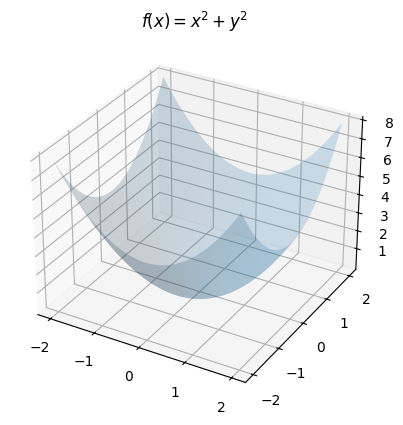

In [18]:
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, f(X, Y), alpha=0.2)
plt.title(r"$f(x) = x^2 + y^2$")

[Back to top](#-Index)

### Problem 1

#### Derivative with respect to $x$ and $y$

**5 Points**

Below, we turn to `sympy` the symbolic computing library to evaluate the partial derivative with respect to $x$ and $y$.  Note that a maximum or minimum value will occur where both the partial derivative with respect to $x$ and $y$ are equal to zero.  Further, the gradient is the vector formed by these partial derivatives.  

$$\nabla f = <2x, 2y>$$

At what point does this suggest the minimum of $f(x, y) = x^2 + y^2$ lies?  Enter your solution as a tuple $(x, y)$ to `minimum_1`.  

In [19]:
x, y = sy.symbols("x y")

In [20]:
sy.diff(f(x, y), x)

2*x

In [21]:
sy.diff(f(x, y), y)

2*y

Text(0.5, 0.92, '$f(x) = x^2 + y^2$')

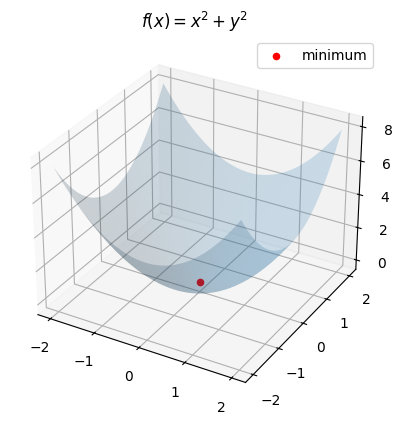

In [22]:
### GRADED
minimum_1 = (0, 0)

### ANSWER CHECK
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, f(X, Y), alpha=0.2)
ax.scatter3D(
    minimum_1[0],
    minimum_1[1],
    f(minimum_1[0], minimum_1[1]),
    s=20,
    c="red",
    label="minimum",
)
plt.legend()
plt.title(r"$f(x) = x^2 + y^2$")

[Back to top](#-Index)

### Problem 2

#### Example with Data

**5 Points**


Below, we load in the data from our earlier credit example and build the model

$$\hat{y} = \theta_0 X + \theta_1$$

and determine the mean squared error as

$$\frac{1}{n} \sum_{i = 1}^n (\hat{y} - y)^2$$

Use scikitlearn to determine the values for $\theta_0$ and $\theta_1$ that minimize the `mse` function.

In [23]:
credit = pd.read_csv("./data/Credit.csv", index_col=0)
X = credit["Rating"].values
y = credit["Balance"].values

In [24]:
def mse(theta0, theta1):
    yhat = theta0 * X + theta1
    error = y - yhat
    squared_error = np.sum(error**2)
    return 1 / (2 * X.shape[0]) * squared_error

In [25]:
mse = np.vectorize(mse)

In [26]:
theta1 = np.linspace(0, 6, 100)
theta0 = np.linspace(-400, -360, 100)
T1, T0 = np.meshgrid(theta1, theta0)

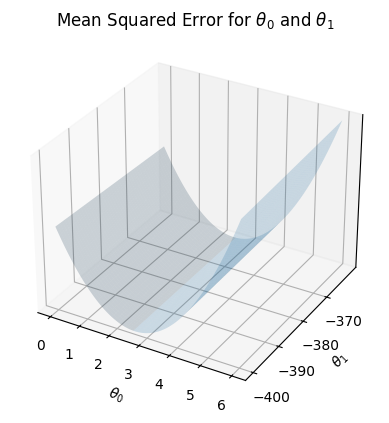

In [27]:
ax = plt.axes(projection="3d")
ax.plot_surface(T1, T0, mse(T1, T0), alpha=0.2)
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_title(r"Mean Squared Error for $\theta_0$ and $\theta_1$")
ax.set_zticks([])
ax.set_yticks(np.arange(-400, -360, 10))

In [28]:
### GRADED
model = LinearRegression(fit_intercept=True).fit(credit[["Rating"]], credit["Balance"])
best_theta_0 = model.coef_
best_theta_1 = model.intercept_

### ANSWER CHECK
print(
    f"Equation with optimal parameters: y = {best_theta_0[0]: .2f}x + {best_theta_1: .2f}"
)

Equation with optimal parameters: y =  2.57x + -390.85
